In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Regression

- Regression means to model the relation between a single dependent and multiple independent variables
- Dependent Variables means that change in the Independent variable will affect the dependent variable.

# Correlation

- Correlation ranges from 0(Perfect Negative) to 1(Perfect Positive)
- Positive correlation means as one variable increases the other one increases aswell
- Negative correlation means as one variable decreases the other one decreases aswell

# Simple Linear Regression

- Simple linear Regression means to model relation between just two variables
- One Variable being Dependent and other being Independent

In [42]:
# Import Dataset
df = pd.read_csv(r"E:\HSNC\SEM 2\ML\SLRD1.csv")

In [43]:
#Print top rows
df.head(5)

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [44]:
#Metadata of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Hours    25 non-null     float64
 1   Scores   25 non-null     float64
dtypes: float64(2)
memory usage: 548.0 bytes


In [45]:
#Detecting Missing Values and droping them
print("Missing Values in data:\n",df.isnull().sum())

Missing Values in data:
 Hours      1
Scores     1
dtype: int64


In [46]:
#Droping the missing values as they are very less
df.dropna(inplace=True)
print("Missing Values in data:\n",df.isnull().sum())

Missing Values in data:
 Hours      0
Scores     0
dtype: int64


           Hours    Scores 
Hours    1.000000  0.976191
Scores   0.976191  1.000000


<Axes: >

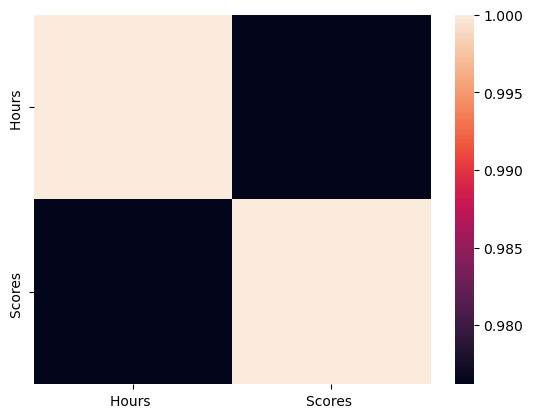

In [47]:
#This will give us the correlation statistics
df.corr
print(df.corr())

#plotting the correlation
#heatmap
sns.heatmap(df.corr())

- From the correlation statistic we can see that there is 0.9(Perfect Positive Correlation) between the two variables

In [48]:
#Adding constant values
x1= sm.add_constant(df['Hours '])
y1 = df['Scores ']
print(x1.shape)
print(y1.shape)

(25, 2)
(25,)


In [49]:
#Splitting the dataset into training and validation sets
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,train_size=0.8,test_size=0.2,random_state = 100)

In [58]:
#Fitting the model
#Write output variable first (Dependent)
score_lm = sm.OLS(y1_train,x1_train).fit()

In [51]:
print(score_lm.params)

const     1.989423
Hours     9.835444
dtype: float64


In [52]:
score_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Scores    R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     356.7
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           2.59e-13
Time:                        17:39:35   Log-Likelihood:                -62.724
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9894      3.106      0.641      0.530      -4.536       8.515
Hours          9.8354      0.521     18.886      0.000       8.741      10.930
==============================================================================
Omnibus:                        7.040   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                1.943
Skew:                          -0.248   Prob(JB):                        0.379
Kurtosis:                       1.556   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The model is best fit as r squared values is less

In [59]:
#Q.2)
data = pd.read_csv(r"E:\HSNC\SEM 2\ML\MBA Salary.csv")

                          S. No.  Percentage in Grade 10    Salary
S. No.                  1.000000               -0.036681  0.018311
Percentage in Grade 10 -0.036681                1.000000  0.395367
Salary                  0.018311                0.395367  1.000000


<Axes: >

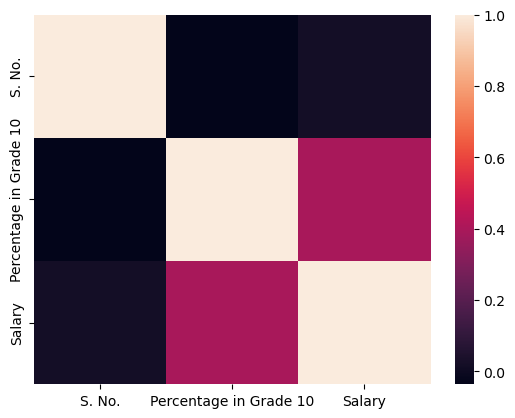

In [60]:
data.corr
print(data.corr())

#Heatmap
sns.heatmap(data.corr())

In [61]:
x= sm.add_constant(data['Percentage in Grade 10'])
y = data['Salary']
print(x.shape)
print(y.shape)

(50, 2)
(50,)


In [62]:
#Splitting the dataset into training and validation sets

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state = 100)

In [64]:
#fitting the model
salary_lm = sm.OLS(y_train,x_train).fit() #output must be wriiten first

In [65]:
print(salary_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [66]:
salary_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     10.16
Date:                Fri, 26 Jan 2024   Prob (F-statistic):            0.00287
Time:                        17:45:09   Log-Likelihood:                -502.43
No. Observations:                  40   AIC:                             1009.
Df Residuals:                      38   BIC:                             1012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.059e+04   7.19e+04      0.426      0.673   -1.15e+05    1.76e+05
Percentage in Grade 10  3560.5874   1116.926      3.188      0.003    1299.489    5821.686
==============================================================================
Omnibus:                        2.048   Durbin-Watson:                   2.611
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.724
Skew:                           0.369   Prob(JB):                        0.422
Kurtosis:                       2.300   Cond. No.                         413.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The model is not best fit as r squared value is less